# Task 1:Deep Learning

In [1]:
import tensorflow as tf
(training_images, training_labels) , (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()


170508288/170498071 [==============================] - 2s 0us/step


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9646687027543795478
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14465892352
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13104325671643301704
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


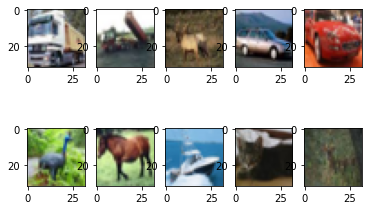

In [3]:
import matplotlib.pyplot as plt
for i in range(1, 11):
  plt.subplot(2, 5, i)
  plt.imshow(training_images[i])


In [4]:
#Normailizing the data
training_images = training_images.astype("float32") / 255                                     
test_images = test_images.astype("float32") / 255

In [5]:
#defining the model layers

cnn_model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape= (32,32,3)),                                          
        tf.keras.layers.Conv2D(32, 3, padding = "valid", activation = "relu"),             
        tf.keras.layers.MaxPooling2D(pool_size = (2,2)),                                  
        tf.keras.layers.Conv2D(64, 3, activation = "relu"),                                                            
        tf.keras.layers.MaxPooling2D(pool_size = (2,2)),                                  
        tf.keras.layers.Conv2D(128, 3, activation = "relu"),                             
        tf.keras.layers.Flatten(),                                                        
        tf.keras.layers.Dense(64, activation = "relu"),                                   
        tf.keras.layers.Dense(10),                                                        
    
    ]
)
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [6]:
cnn_model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),     
    optimizer = tf.keras.optimizers.Adam(learning_rate = 3e-4),                             
    metrics =["accuracy"],                                                       
    )



In [7]:
#training the model
model_history = cnn_model.fit(training_images, training_labels, batch_size = 64, epochs = 40,verbose = 2) 

Epoch 1/40
782/782 - 15s - loss: 1.7047 - accuracy: 0.3828 - 15s/epoch - 19ms/step
Epoch 2/40
782/782 - 3s - loss: 1.3603 - accuracy: 0.5130 - 3s/epoch - 3ms/step
Epoch 3/40
782/782 - 3s - loss: 1.2271 - accuracy: 0.5672 - 3s/epoch - 3ms/step
Epoch 4/40
782/782 - 3s - loss: 1.1305 - accuracy: 0.6048 - 3s/epoch - 3ms/step
Epoch 5/40
782/782 - 3s - loss: 1.0483 - accuracy: 0.6324 - 3s/epoch - 3ms/step
Epoch 6/40
782/782 - 3s - loss: 0.9864 - accuracy: 0.6588 - 3s/epoch - 3ms/step
Epoch 7/40
782/782 - 3s - loss: 0.9389 - accuracy: 0.6735 - 3s/epoch - 3ms/step
Epoch 8/40
782/782 - 3s - loss: 0.8926 - accuracy: 0.6897 - 3s/epoch - 3ms/step
Epoch 9/40
782/782 - 3s - loss: 0.8477 - accuracy: 0.7072 - 3s/epoch - 3ms/step
Epoch 10/40
782/782 - 3s - loss: 0.8167 - accuracy: 0.7175 - 3s/epoch - 3ms/step
Epoch 11/40
782/782 - 3s - loss: 0.7772 - accuracy: 0.7294 - 3s/epoch - 3ms/step
Epoch 12/40
782/782 - 3s - loss: 0.7461 - accuracy: 0.7420 - 3s/epoch - 3ms/step
Epoch 13/40
782/782 - 3s - loss: 0

<function matplotlib.pyplot.show>

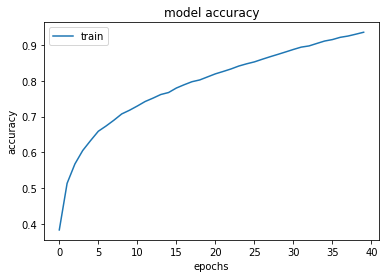

In [8]:
plt.plot(model_history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train'], loc = 'upper left')
plt.show

<function matplotlib.pyplot.show>

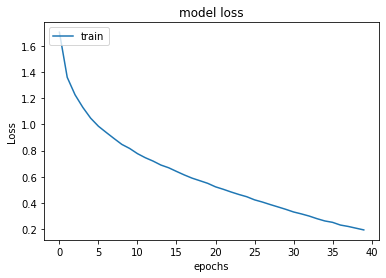

In [9]:
plt.plot(model_history.history['loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['train'], loc = 'upper left')
plt.show

array([  3.213958 ,   5.158993 ,  -6.4191127, -10.393132 ,  -9.03173  ,
       -12.164882 ,  -9.350305 , -15.099677 ,  12.949959 ,   4.035296 ],
      dtype=float32)

'ship'

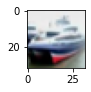

array([ 3.4126105 ,  2.124434  , -4.173169  , -5.1797533 , -2.586411  ,
       -5.7115116 , -9.444092  , -0.66036516,  2.270023  ,  0.6708353 ],
      dtype=float32)

'airplane'

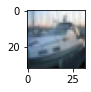

array([ 10.4261465 ,   1.696972  ,   0.5890345 ,   1.9448438 ,
         0.24967629,  -7.6081147 ,  -7.18045   , -10.311866  ,
         0.47079283,  -4.018599  ], dtype=float32)

'airplane'

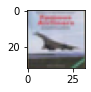

array([-11.42453  ,  -8.974477 ,   5.9219885,   3.4086392,   9.387897 ,
        -1.1750536,   7.022886 ,  -9.947127 , -11.027053 , -12.599844 ],
      dtype=float32)

'deer'

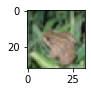

array([ -6.163777  ,  -9.141571  ,  -1.7892338 ,   2.8636622 ,
        -0.93840057,   5.541549  ,   7.2921247 ,  -1.8082639 ,
       -10.624077  ,  -6.8001556 ], dtype=float32)

'frog'

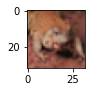

array([ -9.079035 ,  13.444386 , -10.91189  ,   3.8859866, -16.210587 ,
         1.4598686,  -4.5682163,  -4.097637 , -12.095417 ,   3.0727525],
      dtype=float32)

'automobile'

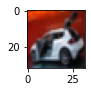

array([ -0.5249586 ,  -6.1504865 ,   3.993936  ,   0.17781311,
        -0.15153784,  -3.7076793 ,   5.7806816 ,  -1.6113673 ,
       -13.652475  ,  -1.096968  ], dtype=float32)

'frog'

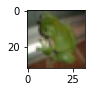

array([ -6.204124 ,  -8.796427 ,   4.9459224,   8.30555  ,  -2.8625393,
         3.7835422,   4.602818 ,   2.1224828, -14.154001 , -10.796405 ],
      dtype=float32)

'cat'

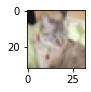

array([ -7.424627 ,  13.296204 ,  -8.320904 ,  -6.7840395,  -7.43118  ,
        -2.2419393,   2.0197191, -11.687235 ,  -5.462435 ,   5.9177475],
      dtype=float32)

'automobile'

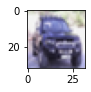

array([  2.5902975,  -6.4452243,  -2.0860786,   2.2446377,   2.5459118,
         3.4988246, -10.057031 ,   3.66193  ,  -4.5752387,  -7.909188 ],
      dtype=float32)

'horse'

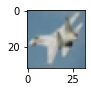

In [10]:
import numpy as np
labels = ["airplane","automobile", "bird", "cat", "deer","dog", "frog", "horse", "ship", "truck"]
pre = cnn_model.predict(test_images)
for i in range(1, 11):
    
    display(pre[i])
    n = np.argmax(pre[i])
    display(labels[n])
    plt.subplot(2, 5, i)
    plt.imshow(test_images[i])
    plt.show()



In [11]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
display(pre)
display(test_labels)
pre = np.argmax(pre, axis =1).astype("int32")
res = tf.math.confusion_matrix(test_labels,pre)


array([[-3.6598794e+00,  3.6797896e-03, -3.8971716e-01, ...,
        -8.6851559e+00, -6.9155049e+00, -8.4666853e+00],
       [ 3.2139580e+00,  5.1589928e+00, -6.4191127e+00, ...,
        -1.5099677e+01,  1.2949959e+01,  4.0352960e+00],
       [ 3.4126105e+00,  2.1244340e+00, -4.1731691e+00, ...,
        -6.6036516e-01,  2.2700231e+00,  6.7083532e-01],
       ...,
       [-1.0145886e+01, -1.0219036e+01,  1.0585431e+00, ...,
         3.2563183e+00, -6.8974686e+00, -8.4120340e+00],
       [-3.8381088e+00, -8.9948303e-01, -3.0758286e+00, ...,
        -6.6683226e+00, -1.2948742e+01, -4.5144010e+00],
       [-8.7933722e+00, -7.4334421e+00,  2.1957536e+00, ...,
         1.4317085e+01, -1.3123499e+01, -1.4786219e+01]], dtype=float32)

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[766,  17,  57,  21,  29,   6,  14,  17,  48,  25],
       [ 34, 801,  15,  11,   9,   3,  14,   5,  30,  78],
       [ 60,   5, 640,  70,  95,  59,  40,  20,   5,   6],
       [ 18,  14,  68, 557,  73, 149,  59,  38,   8,  16],
       [ 12,   4,  76,  65, 714,  29,  41,  45,   6,   8],
       [ 10,   5,  59, 198,  55, 573,  21,  65,   5,   9],
       [  5,   3,  52,  56,  47,  24, 795,   6,   5,   7],
       [ 14,   6,  28,  40,  66,  46,   6, 775,   1,  18],
       [ 82,  26,  18,  18,  13,   4,   6,   7, 791,  35],
       [ 24,  74,  13,  19,  13,   8,   3,  15,  24, 807]], dtype=int32)>

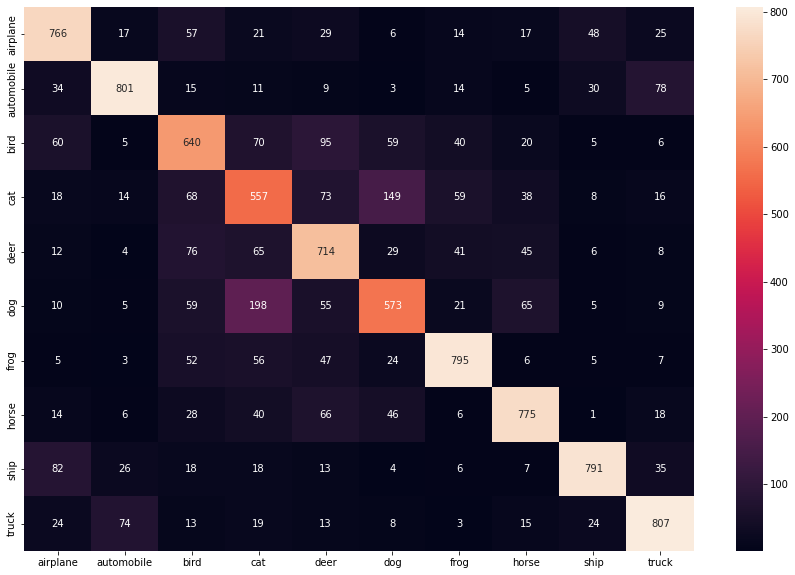

In [12]:
display(res)
plt.figure(figsize = (15, 10))
sn.heatmap(res, annot=True, xticklabels=labels, yticklabels=labels, fmt = 'g')

In [13]:
test_loss, test_acc = cnn_model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 1.2023 - accuracy: 0.7219 - 856ms/epoch - 3ms/step
